In [1]:
#useful imports

import numpy as np
from numpy.random import randint,rand,seed,normal,permutation
import torch
import torchvision
import torch.nn.functional as F
from torch.utils.data import random_split,Dataset,DataLoader
from torchvision import datasets, transforms
from torch import nn, optim

from torchvision.datasets import MNIST
import torchvision.transforms as T


from keras.datasets import mnist
import matplotlib.pyplot as plt
from copy import deepcopy
from tqdm import tqdm

from scipy.special import softmax
import spacy
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data_dir = 'https://drive.google.com/drive/folders/1stS7Uj-GAtJASlgUFxyz0JM58dnoTA8L?usp=drive_link'

In [4]:

# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_input_file = 'glove.txt'
# word2vec_output_file = 'word2vec.txt'
# glove2word2vec(glove_input_file, word2vec_output_file)

In [5]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_input_file = 'https://drive.google.com/file/d/18aLgOmWo7bFidz3cJES52m51CNGS0SoQ/view?usp=sharing'
# word2vec_output_file = 'glove.6B.100d.txt.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file)

In [6]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file ='/content/drive/My Drive/test/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-6-9e4f2c338670>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [7]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


In [8]:
emails_raw = pd.read_csv('/content/drive/My Drive/test/enron_spam_ham.csv').to_numpy()

In [9]:
# file_path = '/content/drive/My Drive/test/message.txt'

# # Open and read the file
# with open(file_path, 'r') as file:
#     content = file.read()

# # Print the file content
# print(content)

In [10]:
emails_raw[0]

array(["Subject: sevil yamin  anne ,  vasant sent this information to norma . i shall fwd his message to you .  vince  - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 04 / 10 / 2001  03 : 02 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  stinson gibner  04 / 10 / 2001 02 : 57 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : sevil yamin  vince ,  do you want me to do this , or vasant ?  - - stinson  - - - - - - - - - - - - - - - - - - - - - - forwarded by stinson gibner / hou / ect on 04 / 10 / 2001  02 : 57 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  from : anne labbe / enron @ enronxgate on 04 / 06 / 2001 09 : 57 am  to : stinson gibner / hou / ect @ ect  cc :  subject : sevil yamin  stinson ,  i am the new hr generalist for the research group because norma villarreal is  moving to business analysis and reporting . earlier this week , norma and i  met with vince , and he said that he was going to talk to you

In [11]:
sp = spacy.load('en_core_web_sm')

In [16]:
text, label = emails_raw[0]
print(text)
document = sp(text.lower())
print(document)
print(type(document))

Subject: sevil yamin  anne ,  vasant sent this information to norma . i shall fwd his message to you .  vince  - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 04 / 10 / 2001  03 : 02 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  stinson gibner  04 / 10 / 2001 02 : 57 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : sevil yamin  vince ,  do you want me to do this , or vasant ?  - - stinson  - - - - - - - - - - - - - - - - - - - - - - forwarded by stinson gibner / hou / ect on 04 / 10 / 2001  02 : 57 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  from : anne labbe / enron @ enronxgate on 04 / 06 / 2001 09 : 57 am  to : stinson gibner / hou / ect @ ect  cc :  subject : sevil yamin  stinson ,  i am the new hr generalist for the research group because norma villarreal is  moving to business analysis and reporting . earlier this week , norma and i  met with vince , and he said that he was going to talk to you about w

In [17]:
for word in document:
    print(word)
    print(type(word))
    print(str(word))
    print(type(str(word)))
    break

subject
<class 'spacy.tokens.token.Token'>
subject
<class 'str'>


In [18]:
model[str(word)]

array([-0.098252 ,  0.053359 ,  0.3814   ,  0.25006  ,  0.37622  ,
        0.39795  , -0.42648  , -0.11512  , -0.062542 , -0.30872  ,
       -0.1126   ,  0.017485 ,  0.42269  , -0.05028  , -0.036123 ,
       -0.17231  ,  0.022046 ,  0.269    , -0.23359  ,  0.012059 ,
       -0.17243  , -0.204    , -0.0737   , -0.11341  ,  0.11035  ,
       -0.56162  ,  0.080746 , -0.36331  , -0.30045  , -0.12815  ,
       -0.45184  ,  0.012891 , -0.1789   , -0.44184  ,  0.093577 ,
        0.59694  ,  0.023494 , -0.4611   , -0.45794  ,  0.11821  ,
       -0.5165   , -0.11584  ,  0.083922 ,  0.016293 , -0.25888  ,
       -0.30356  ,  0.28238  , -0.031084 ,  0.045921 , -0.65211  ,
        0.98727  ,  0.023694 ,  0.22667  ,  0.75697  , -0.20568  ,
       -1.3769   ,  0.41452  , -0.54832  ,  1.5247   ,  0.16025  ,
        0.35099  ,  0.99004  , -0.32081  , -0.51617  ,  1.7852   ,
       -0.36472  ,  0.52039  , -0.0099243,  0.066323 ,  0.073432 ,
       -0.40247  ,  0.04315  ,  0.49818  ,  0.50381  , -0.3044

In [19]:
emails_raw.shape

(28138, 2)

In [20]:
for email in tqdm(emails_raw):
    text, label = email
    print(text)
    break

  0%|          | 0/28138 [00:00<?, ?it/s]

Subject: sevil yamin  anne ,  vasant sent this information to norma . i shall fwd his message to you .  vince  - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 04 / 10 / 2001  03 : 02 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  stinson gibner  04 / 10 / 2001 02 : 57 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : sevil yamin  vince ,  do you want me to do this , or vasant ?  - - stinson  - - - - - - - - - - - - - - - - - - - - - - forwarded by stinson gibner / hou / ect on 04 / 10 / 2001  02 : 57 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  from : anne labbe / enron @ enronxgate on 04 / 06 / 2001 09 : 57 am  to : stinson gibner / hou / ect @ ect  cc :  subject : sevil yamin  stinson ,  i am the new hr generalist for the research group because norma villarreal is  moving to business analysis and reporting . earlier this week , norma and i  met with vince , and he said that he was going to talk to you about w

In [21]:
# emails_embeddings = torch.ones(100).to(device)
# emails_embeddings = np.zeros(100)
emails_embeddings = [] #This will be a list of np arrays
# print(emails_embeddings)
count = 0
for email in tqdm(emails_raw):
    text, label = email
    document = sp(text.lower())

    words_in_doc = 0
    # doc_embedding = torch.zeros(100).to(device)
    doc_embedding = np.zeros(100)


    for word in document:

        if str(word)in model:
            words_in_doc+=1
            word_embedding = model[str(word)]
            # torch_word_embedding = torch.from_numpy(word_embedding).to(device)
            doc_embedding+=word_embedding



    doc_embedding = doc_embedding/words_in_doc
    # print(doc_embedding)
    # print(doc_embedding.shape)
    # emails_embeddings = torch.cat((emails_embeddings, doc_embedding),dim=0)
    # print(emails_embeddings)
    emails_embeddings.append(doc_embedding)
    # print(emails_embeddings)
    # print(len(emails_embeddings))
    # count+=1
    # if count==2:
    #   break


 15%|█▍        | 4096/28138 [03:30<20:37, 19.43it/s]


KeyboardInterrupt: ignored

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
emails_embeddings[0]

array([-4.37622214e-01,  2.91747647e-01,  4.46433682e-01, -4.99543788e-01,
       -1.55564459e-01,  5.86799765e-02,  1.51524022e-01,  6.33064256e-02,
       -2.04417315e-01,  1.78659207e-01,  3.04671649e-01, -1.05319386e-01,
        1.21534547e-01,  1.48667727e-01,  2.95478057e-01, -6.14197867e-02,
        2.78467246e-01, -3.19167350e-01, -3.50274674e-01,  1.02720839e-01,
        3.29825392e-01,  2.67235508e-01,  1.35532020e-01,  4.88986030e-01,
        3.69819844e-01,  8.62888053e-02, -8.14431650e-02, -5.01819413e-01,
       -1.05849846e-01, -1.97657797e-01, -1.17333600e-01,  3.18218639e-01,
        7.71797097e-02,  1.21786967e-01, -7.53295493e-02,  3.55375170e-02,
        5.41540271e-02,  4.01104181e-01, -1.44676295e-01, -6.71737383e-02,
       -2.18747586e-01, -5.05502406e-01, -2.97167646e-03, -4.22863999e-01,
        3.31642116e-03, -8.27475752e-02, -2.41133589e-01, -5.72058499e-01,
        2.18677925e-01, -6.74991009e-01, -2.76503819e-01, -1.02604158e-01,
       -1.03371694e-03,  

In [ ]:
len(emails_embeddings)

28138

In [ ]:
emails_embeddings[0].shape

(100,)

In [ ]:
import csv

In [ ]:
# with open('emails_embeddings.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(emails_embeddings)

In [ ]:
# emails_embeddings_nparray = np.array(emails_embeddings)

In [ ]:
# file_name = 'emails_embeddings_np.csv'

# # Use the 'savetxt' function from numpy
# np.savetxt(file_name, emails_embeddings, delimiter=',')

In [ ]:
from torch.utils.data import DataLoader
from torchtext.data.functional import to_map_style_dataset

In [ ]:
count = 0
y = []
for email in tqdm(emails_raw):
    text,label = email
    # print(label)
    y.append(label)
    # print(label.shape)
    # count+=1
    # if count==5:
    #   break


100%|██████████| 28138/28138 [00:00<00:00, 697554.97it/s]


In [ ]:
y = np.array(y)

In [ ]:
y.shape

(28138,)

In [ ]:
y

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
y[0]

0

In [ ]:
# divide into training, validation, and testing data sets

def separate_data(X,Y,percent_validation=0.1,percent_test=0.1):

    N = len(X)
    len_validation = int(percent_validation*N)
    len_test = int(percent_test*N)
    len_train = N - len_validation - len_test

    len_t_v = len_train+len_validation

    X_train      = X[:len_train]
    Y_train      = Y[:len_train]
    X_validation = X[len_train:len_t_v]
    Y_validation = Y[len_train:len_t_v]
    X_test = X[len_t_v:]
    Y_test = Y[len_t_v:]

    return (X_train,Y_train,X_validation,Y_validation,X_test,Y_test)

# tests

# X_ = np.array(list(range(100)))
# Y_ = np.array(list(range(100)))

# separate_data(X_,Y_)
# separate_data(X_,Y_,0.2,0.2)

In [ ]:
X_ = torch.tensor(emails_embeddings,dtype=torch.float32)
Y_ = torch.tensor(y, dtype=torch.long)

In [ ]:
X_.shape

torch.Size([28138, 100])

In [ ]:
Y_.shape

torch.Size([28138])

In [ ]:
print(X_.size(),'\n')
print(Y_.size(),'\n')
# print(X_[:5],'\n')
# print(Y_[:5],'\n')

print('     Point Coordinates    ','\tGroup Label')
print('--------------------------','\t-----------')
# for k in range(10):
#     print(f'{X_[k]}\t    {Y_[k]}')

torch.Size([28138, 100]) 

torch.Size([28138]) 

     Point Coordinates     	Group Label
-------------------------- 	-----------


In [ ]:
X_train_blobs,Y_train_blobs,X_val_blobs,Y_val_blobs,X_test_blobs,Y_test_blobs = \
                                                                       separate_data(X_,Y_,0.1,0.1)

N_train,N_val,N_test = len(X_train_blobs),len(X_val_blobs),len(X_test_blobs)


print('X_train_blobs.size():',X_train_blobs.size())
print('Y_train_blobs.size():',Y_train_blobs.size())
print('X_val_blobs.size():  ',X_val_blobs.size())
print('Y_val_blobs.size():  ',Y_val_blobs.size())
print('X_test_blobs.size(): ',X_test_blobs.size())
print('Y_test_blobs.size(): ',Y_test_blobs.size())
print(X_test_blobs[0], Y_test_blobs[0])

X_train_blobs.size(): torch.Size([22512, 100])
Y_train_blobs.size(): torch.Size([22512])
X_val_blobs.size():   torch.Size([2813, 100])
Y_val_blobs.size():   torch.Size([2813])
X_test_blobs.size():  torch.Size([2813, 100])
Y_test_blobs.size():  torch.Size([2813])
tensor([-0.2927,  0.2425,  0.4053, -0.3239, -0.1126,  0.0991,  0.0123,  0.0287,
        -0.0483,  0.0437,  0.3799, -0.1402,  0.0832,  0.1118,  0.2205, -0.2183,
         0.1848, -0.0485, -0.3297,  0.2099,  0.1884,  0.0321,  0.1937,  0.2619,
         0.2216,  0.0816,  0.0558, -0.2924,  0.0272, -0.2180, -0.0038,  0.4076,
        -0.0699,  0.0327, -0.0356,  0.2110,  0.0848,  0.2575, -0.0182, -0.0851,
        -0.0865, -0.3785, -0.0178, -0.4077, -0.0760, -0.1261, -0.0393, -0.3777,
        -0.0033, -0.5843,  0.0348, -0.0375,  0.0372,  0.7302, -0.4406, -1.8577,
         0.0094, -0.0559,  1.2972,  0.4387, -0.2408,  0.3734, -0.1913, -0.0196,
         0.6219,  0.0048,  0.3600,  0.3556,  0.3466, -0.0067, -0.1451, -0.1450,
        -0.1582, 

In [ ]:
class SpamModel(torch.nn.Module):

        # We first define a number of local variables for layers

        def __init__(self):
            super(SpamModel,self).__init__()
            self.linear1 = torch.nn.Linear(100,15)
            self.activation1 = torch.nn.ReLU()
            self.linear2 = torch.nn.Linear(15,2)

        # foward defines the forward pass of a FFNN,
        # sending a vector x through each layer and then returning it

        def forward(self,x):

            x = self.linear1(x)
            x = self.activation1(x)                  # we have to explicitly send x through the sigmoid function
            x = self.linear2(x)
                                              # we will take care of the softmax later
            return x

In [ ]:
spam_model = SpamModel()

print(spam_model)

SpamModel(
  (linear1): Linear(in_features=100, out_features=15, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=15, out_features=2, bias=True)
)


In [ ]:
# num_epoches = 100

# loss_fn = nn.CrossEntropyLoss()

# # optimizer = optim.SGD(blobs_model.parameters(),lr=0.1)
# # optimizer = optim.Adam(blobs_model.parameters())
# optimizer = optim.Adagrad(spam_model.parameters(),lr =.01)
# # optimizer = optim.RMSprop(blobs_model.parameters())

# num_epochs = num_epoches

# for epoch in tqdm(range(num_epochs)):           # for each epoch

#     spam_model.train()     # We are in training mode, so keep track of differentials for backtracking

#     for k in range(len(X_train_blobs)):         # train the network on all the training data

#         optimizer.zero_grad                     # reset the differentials to 0

#         Y_hat = spam_model(X_train_blobs[k])      # forward pass for this batch; Y_hat is output of network

#         loss = loss_fn(Y_hat,Y_train_blobs[k])     # calculate the loss

#         loss.backward()                         # do backpropagation to calculate the differentials

#         optimizer.step()                        # adjust parameters based on one step of gradient descent

100%|██████████| 100/100 [23:53<00:00, 14.34s/it]


In [ ]:
# blobs_model(X_test_blobs[0])

tensor([-0.2449, -0.2283], grad_fn=<ViewBackward0>)

In [ ]:
# sm = nn.Softmax(dim=0)

# def getPrediction(x):
#     return torch.argmax(x).item()

# for k in range(20):
#     Y_hat = getPrediction(spam_model(X_train_blobs[k]))
#     print(f'{X_test_blobs[k]}\t{Y_test_blobs[k]}   {Y_hat}   {sm(spam_model(X_test_blobs[k]))}')

tensor([-0.2927,  0.2425,  0.4053, -0.3239, -0.1126,  0.0991,  0.0123,  0.0287,
        -0.0483,  0.0437,  0.3799, -0.1402,  0.0832,  0.1118,  0.2205, -0.2183,
         0.1848, -0.0485, -0.3297,  0.2099,  0.1884,  0.0321,  0.1937,  0.2619,
         0.2216,  0.0816,  0.0558, -0.2924,  0.0272, -0.2180, -0.0038,  0.4076,
        -0.0699,  0.0327, -0.0356,  0.2110,  0.0848,  0.2575, -0.0182, -0.0851,
        -0.0865, -0.3785, -0.0178, -0.4077, -0.0760, -0.1261, -0.0393, -0.3777,
        -0.0033, -0.5843,  0.0348, -0.0375,  0.0372,  0.7302, -0.4406, -1.8577,
         0.0094, -0.0559,  1.2972,  0.4387, -0.2408,  0.3734, -0.1913, -0.0196,
         0.6219,  0.0048,  0.3600,  0.3556,  0.3466, -0.0067, -0.1451, -0.1450,
        -0.1582, -0.3864,  0.1154, -0.0439,  0.0084, -0.0239, -0.8111, -0.3025,
         0.5421, -0.1936, -0.2635, -0.0303, -0.9652, -0.0094,  0.0668, -0.2516,
         0.0219, -0.2110, -0.0899,  0.0232, -0.0150,  0.1343, -0.3866,  0.0461,
         0.0045, -0.3458,  0.3420, -0.11

In [ ]:
# blobs_model = BlobsModel()

# # print(blobs_model)

# loss_fn = nn.CrossEntropyLoss()

# # optimizer = optim.SGD(blobs_model.parameters(),lr=0.0001)
# # optimizer = optim.Adam(blobs_model.parameters())
# optimizer = optim.Adagrad(blobs_model.parameters(),lr=0.01)
# # optimizer = optim.RMSprop(blobs_model.parameters(),lr=0.001)

# num_epochs = 100

# for epoch in tqdm(range(num_epochs)):           # for each epoch

#     blobs_model.train()                     # We are in training mode, so keep track of differentials for backtracking

#     for k in range(len(X_train_blobs)):         # train the network on all the training data

#         optimizer.zero_grad                     # reset the differentials to 0

#         Y_hat = blobs_model(X_train_blobs[k])      # forward pass for this batch; Y_hat is output of network

#         loss = loss_fn(Y_hat,Y_train_blobs[k])     # calculate the loss

#         loss.backward()                         # do backpropagation to calculate the differentials

#         optimizer.step()                        # adjust parameters based on one step of gradient descent


# blobs_model.eval()          # stop doing backprob, just run model as feed-forward phase
# num_correct_test = 0

# for k in range(len(X_test_blobs)):

#     Y_hat_test = blobs_model(X_test_blobs[k])
#     if getPrediction(Y_hat_test) == Y_test_blobs[k]:
#         num_correct_test += 1

# test_accuracy = num_correct_test / len(X_test_blobs)

# print("Accuracy:", test_accuracy )

In [ ]:
# blobs_model.eval()          # stop doing backprob, just run model as feed-forward phase
# num_correct_test = 0

# for k in range(len(X_test_blobs)):

#     Y_hat_test = blobs_model(X_test_blobs[k])
#     if getPrediction(Y_hat_test) == Y_test_blobs[k]:
#         num_correct_test += 1

# test_accuracy = num_correct_test / len(X_test_blobs)

# print("Accuracy:", test_accuracy )

Accuracy: 0.5879843583362958


In [ ]:
from sklearn.datasets import make_blobs
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class BlobsDataset(Dataset):

    def __init__(self, X,Y):
        self.X_blobs = X
        self.Y_blobs = Y

    def __len__(self):
        return len(self.X_blobs)

    # return a pair x,y at the index idx in the data set
    def __getitem__(self, idx):
        return self.X_blobs[idx], self.Y_blobs[idx]

In [ ]:
batch_size = 64

blobs_ds = BlobsDataset(X_,Y_)

gen = torch.Generator().manual_seed(0)  # this will ensure the same split every time

train_blobs_ds,val_blobs_ds,test_blobs_ds = random_split(blobs_ds, [0.8,0.1,0.1], generator=gen)

blobs_training_dataloader =   DataLoader(train_blobs_ds, batch_size=batch_size, shuffle=True)

blobs_validation_dataloader = DataLoader(val_blobs_ds,   batch_size=batch_size, shuffle=True)

blobs_testing_dataloader =    DataLoader(test_blobs_ds,  batch_size=batch_size, shuffle=True)

In [ ]:
for x,y in blobs_training_dataloader:
    print(x)
    print(y)
    break

tensor([[-0.1760,  0.2254,  0.5354,  ..., -0.3825,  0.5371,  0.2332],
        [-0.1530,  0.3672,  0.4590,  ..., -0.3677,  0.5838,  0.0286],
        [-0.1202,  0.2702,  0.3504,  ..., -0.3594,  0.4407, -0.0018],
        ...,
        [-0.1263,  0.1172,  0.3661,  ..., -0.4050,  0.4628,  0.2197],
        [-0.3458,  0.3118,  0.4597,  ..., -0.4296,  0.4174,  0.0276],
        [-0.1099,  0.2412,  0.3736,  ..., -0.2650,  0.5147,  0.1323]])
tensor([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])


In [ ]:
for x,y in blobs_training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([64, 100]) torch.Size([64])


In [ ]:
def show_performance_curves(training_loss,validation_loss,training_accuracy,validation_accuracy,test_accuracy):

    plt.figure(figsize=(5, 3))
    plt.plot(training_loss,label='Training',color='g')
    plt.plot(validation_loss,label='Validation',color='b')
    plt.title('Training and Validation Loss')
    plt.legend(loc='upper right')
#     plt.ylim(-0.1,(max(max(training_loss),max(validation_loss))*1.1) )
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    print('Final Training Loss:  ',np.around(training_loss[-1],6))
    print('Final Validation Loss:',np.around(validation_loss[-1],6))

    plt.figure(figsize=(5, 3))
    plt.plot(training_accuracy,label='Training',color='g')
    plt.plot(validation_accuracy,label='Validation',color='b')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='lower right')
#     plt.ylim(-0.1,1.1)
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    print('Final Training Accuracy:  ',np.around(training_accuracy[-1],6))
    print('Final Validation Accuracy:',np.around(validation_accuracy[-1],6))
    print()

    print("Test Accuracy:", test_accuracy.item())
    print()

In [ ]:
blobs_model2 = BlobsModel()

# print(blobs_model)

loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(blobs_model2.parameters(),lr=0.001)
# optimizer = optim.Adam(blobs_model2.parameters())
optimizer = optim.Adagrad(blobs_model2.parameters(),lr=0.01)
# optimizer = optim.RMSprop(blobs_model2.parameters(),lr=0.001)

num_epochs = 500

batch_size = 64

training_losses = np.zeros(num_epochs)
val_losses      = np.zeros(num_epochs)

training_accuracy = np.zeros(num_epochs)
val_accuracy      = np.zeros(num_epochs)

for epoch in tqdm(range(num_epochs)):
    # training
    blobs_model2.train()
    t_loss = 0.0
    t_num_correct = 0

    for X_train_batch,Y_train_batch in blobs_training_dataloader:

        optimizer.zero_grad
        Y_train_hat = blobs_model2(X_train_batch)
        loss = loss_fn(Y_train_hat,Y_train_batch)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()

        # If we just use the scalar class number, it must be a long (we did this when creating the dataset)
        t_num_correct += (torch.argmax(Y_train_hat,dim=1) == Y_train_batch).float().sum()

    training_losses[epoch]   = t_loss/N_train
    training_accuracy[epoch] = t_num_correct/N_train

    #  validation
    v_loss = 0.0
    blobs_model2.eval()
    v_num_correct = 0

    for X_val_batch,Y_val_batch in blobs_validation_dataloader:

        Y_hat_val = blobs_model2(X_val_batch)
        loss = loss_fn(Y_hat_val,Y_val_batch)
        v_loss += loss.item()

        v_num_correct += (torch.argmax(Y_hat_val,dim=1) == Y_val_batch).float().sum()

    val_losses[epoch]   = v_loss/N_val
    val_accuracy[epoch] = v_num_correct/N_val

#  testing
num_correct_test = 0
blobs_model2.eval()

for X_test_batch,Y_test_batch in blobs_testing_dataloader:
    Y_hat_test = blobs_model2(X_test_batch)
    num_correct_test += (torch.argmax(Y_hat_test,dim=1) == Y_test_batch).float().sum()

test_accuracy = num_correct_test / N_test

show_performance_curves(training_losses,val_losses,training_accuracy,val_accuracy,test_accuracy)

100%|██████████| 500/500 [04:06<00:00,  2.03it/s]


NameError: ignored

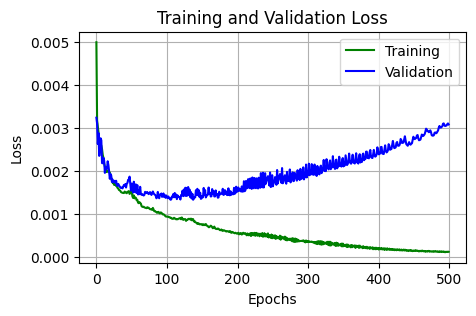

Final Training Loss:   0.000124
Final Validation Loss: 0.003089


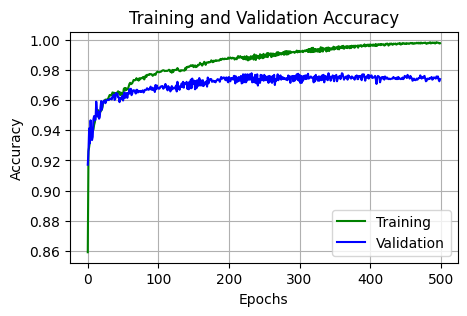

Final Training Accuracy:   0.997868
Final Validation Accuracy: 0.974049

Test Accuracy: 0.9687166810035706



In [ ]:
show_performance_curves(training_losses,val_losses,training_accuracy,val_accuracy,test_accuracy)